
<center><h1>PREDICTION OF AN AMERICAN FOOTBALL PLAY</h1></center>

---

<br>
Welcome to my Ironhack Data Analist Bootcamp Final Project (cohort july'22 part time), I hope you enjoy reading it as much as I did doing it.
<br>
<br>

* <h2>Introduction to the topic</h2><br>

American football is a team game of 11 players per team that is played in a 100 yards long field with a 10-yard "endzone" at either end, in which teams score touchdowns.

Similar to most team sports, the objective is to work the ball down the field towards your opponent's goal-line in order to score.

In order to do so, the team's quarterback will usually either throw the ball downfield to a receiver, or hand the ball off to his running back, who will attempt to carry the ball forwards.

Teams get four attempts – known as "downs" – to move the ball a total of at least 10 yards up the field. The first of these tries is "first down", the next "second down" and so on. Once they make it 10 yards (or further), the downs reset and it's back to first down.

If a team has not made it ten yards after four downs, possession is turned over to the opposition.

As a result, teams facing fourth down will usually choose to either kick a field goal, if they are close enough to the posts, or else "punt" the ball downfield, ensuring their opponents take possession closer to their own goal-line.
<br>
<br>

* <h2>Goals & objectives of this study</h2><br>

This study is made from a defensive coordinator's point of view and has the main objective of predicting whether the next play the opposing offense will make will be a pass or a run play.

This knowledge is crucial for a defensive coordinator and it can give a tremendous advantage to a defensive coordinator, because if he can anticipate the opponent's play, he will be able to put a better defense on the field.
<br>
<br>

* <h2>Description of the database</h2><br>

This database was made by me, after watching 4 recorded games of Alcobendas Cavaliers, one of the american football teams that are currently playing in the first division of the Spanish National League and one of the teams I faced last December. (we won btw 😏)

I filled up a spreadsheet in excel with the features I normally use to scout my opponents and some others that I considered interesting and useful to run a machine learning model to try to predict the next play they are going to play.

Following I am going to describe each feature for better comprehension.<br>
<br>

| **FEATURES** | **TYPE** |  **DESCRIPTION** |
| :--- | :---: | :--- |
| Quarter | Numerical (discrete) | A football game has 4 quarters, 2 of them in each half of the game. |
| Drive number | Numerical (discrete) | A drive is a set of offensive plays from the time they iniciate their attack until the opponent team gets the possession of the ball. |
| Scoreboard | Categorical | It shows if the studied team is winning, losing or tying in the moment they are attacking. Teams normally play different plays depending on the result of the scoreboard. |
| Down | Numerical (discrete) | As explained before, every down is an attempt that the offensive team has. They have 4 downs to move the ball 10 yards up to the field. Teams play different type of plays depending on which down they are in order to get 4 new downs. |
| Distance | Categorical | The distance to get a new first down, or to score. "Short" for distances of 4 or less yards, "medium" for distances between 5 and 10 yards, "long" for distances further than 10 yards. It's obvious to think that teams will play different type of plays depending on that distance i.e. long passes on long distances. |
| Field | Categorical | Teams play different types of plays depending on whether they are in their own field or in the opponent's field close to score. |
| Hash | Categorical | Hash marks are two rows of lines near the middle of the field that are parallel to the side lines. They work as a limit where the ball is going to be spotted depending where the previous play finished. Some team have patterns of plays played depending if they start the play on the left or right side. |
| Formation | Categorical | The initial formation of the offensive players is going to give information about the play (i.e. a formation with plenty of wide receivers is going to be more likely to be a pass play) |
| Motion | Categorical | If there is a previous movement of one of the players before the snap of the ball or not. |
| Box | Numerical (discrete) | Number of players placed within the space between the players at the end of the offensive line. |
| Personnel | Numerical (discrete) | Classification of how many runningbacks and tight ends are aligned on the offensive formation (i.e. "10 personnel" means 1 RB 0 TE, "21 personnel" means 2 RB and 1 TE). We can think that as much RB's are in the offense, more likely to run the ball instead of passing it.|
| QB position | Categorical | Initial position of the quarterback. It can be under the center or shotgun. |
| RB position | Categorical | Where the runningback or runningbacks are placed. We can see patterns of plays on where they are placed |
| WR field side | Numerical (discrete) | Number of wide receivers are placed on the wide side of the field |
| WR boundary side | Numerical (discrete) | Number of wide receivers are placed on the narrow side of the field |
| Play | Categorical | This is the name of the exact play itself. This feature is going to be deleted in order to avoid errors in our prediction. |
| Play type specific | Categorical | Classification of the type of play more detailed than just "run" or "pass". There are different kind of runs and different kind of passes. This feature is going to be deleted in order to avoid errors in our prediction. |
| Play type | Categorical | In our case, the target variable. Type of the play. Run or pass the ball, that's the question. |
| Result | Categorical | The result that the play produced (i.e. if the pass was complete or not). This feature is going to be deleted in order to avoid errors in our prediction. |
| Gain | Categorical | The result of the play in distance. This feature is going to be deleted in order to avoid errors in our prediction. |
| Score | Categorical | If the play produced a Touchdown, another kind of score or not. This feature is going to be deleted in order to avoid errors in our prediction. |
| Defense front | Numerical (discrete) | Number of defensive line and linebackers are expected on the defense. Offensive Coordinators play diferent plays depending on the front they expect. |
| Defense rush | Numerical (discrete) | Number of defenders expected to go directly to tackle the QB. Offensive Coordinators play diferent plays depending if the defense is aggresive or more conservative. |
| Defense cover type | Categorical | Type of cover that defensive backs are expected to play. There are some teams that they like to play more zone coverage or man to man coverage. Offensive Coordinators play diferent plays depending on that. |

<br>
<br>
<a class="anchor" id="0.1"></a>

* <h2>Table of contents</h2><br>

* 1. [Importing libraries and dependencies](#1)
* 2. [Import the dataset](#2)
* 3. [Data cleaning](#3)
* 4. [Exploratory Data Analysis](#4)
* 5. [Visualizations of the target variable](#5)
    - 5.1 [Visualization of the target variable with some of the explanative variables](#5.1)
* 6. [Preprocessing](#6)
    - 6.1 [Encoding the features](#6.1)
    - 6.2 [Define the target and explanative variables](#6.2)
    - 6.3 [Train Test Split](#6.3)
* 7. [Modeling a Random Forest Classifier using GridSearchCV](#7)
    - 7.1 [Evaluation of the Random Forest Classifier](#7.1)
* 8. [Modeling a Gradient Boosting Classifier using GridSearchCV](#8)
    - 8.1 [Evaluation of the Gradient Boosting Classifier](#8.1)
* 9. [Modeling a XGboost Classifier using GridSearchCV](#9)
    - 9.1 [Evaluation of the XGboost Classifier](#9.1)
* 10. [Conclusions](#10)
* 11. [Saving the model to deploy it](#11)
<br>
<br>

## 1. Importing libraries and dependencies <a class="anchor" id="1"></a>
[Back to the table of contents](#0.1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pdp
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

## 2. Import the dataset <a class="anchor" id="2"></a>
[Back to the table of contents](#0.1)

In [2]:
data = pd.read_excel("database/alcobendas_cavaliers_scout_final_project.xlsx")
data

,quarter,drive_number,scoreboard,down,distance,field,hash,formation,motion,box,personnel,qb_position,rb_position,wr_field_side,wr_boundary_side,play,play_type_specific,play_type,result,gain,score,defense_front,defense_rush,defense_cover_type
0,1,1,tying,1,medium,own_field,left,bunch_close,no,7,10,gun,side_boundary,3,1,curl,quick_pass,pass,incomplete,no_gain,no,33,5,zone_coverage
1,1,1,tying,2,medium,own_field,left,trips,no,7,10,gun,side_boundary,3,1,hitch,quick_pass,pass,complete,short_gain,no,33,4,mixed_coverage
2,1,1,tying,3,medium,own_field,right,trips,no,7,10,gun,side_boundary,3,1,flood,long_pass,pass,sack,loss,no,33,4,mixed_coverage
3,1,1,tying,4,long,own_field,right,punt,no,9,99,punt,punt,1,1,punt,special_teams,special_teams,punt,no_gain,no,punt_return,punt_return,punt_return
4,1,2,tying,1,medium,opponent_field,left,trips,yes,7,10,gun,side_boundary,2,2,rb_draw,inside_run,run,rush,medium_gain,no,33,3,mixed_coverage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,4,9,winning,2,medium,own_field,left,trips,no,7,10,gun,symmetrical,3,1,flood,long_pass,pass,incomplete,no_gain,no,34,5,zone_coverage
215,4,9,winning,3,medium,own_field,left,gun,no,7,10,gun,side_field,2,2,z_screen,screen_field,pass,complete,medium_gain,no,34,3,zone_coverage
216,4,9,winning,1,medium,own_field,right,gun,yes,7,10,gun,side_field,3,1,counter,inside_run,run,rush,loss,no,34,6,man_coverage
217,4,9,winning,2,long,own_field,right,bunch_close,no,7,10,gun,symmetrical,3,1,qb_draw,inside_run,run,rush,medium_gain,no,34,5,man_coverage


>Since my study will be based on predicting the play that the opposing offense will play, I am going to eliminate the rows equivalent to the fourth down and focus on my study of the first three downs.<br>
>
>The fourth down is normally used by teams to move the ball away with a punt and this should be analyzed in a separate study.
>
>
>In addition to that, I will drop some features that are strictly related to the target variable because they give you a subtype of the play or the result of the play itself (i.e. In the column "result" we have values like "complete" or "incomplete" that they can only be linked to a "pass" play, so the results of the model will be biased).<br>
>
>I will also drop the column "qb_position" because it has almost one unique value and it's not going to be useful at all.

In [3]:
# Deleting all the fourth downs

data = data[data.down != 4]

In [4]:
# Deleting features strictly related to the play

data = data.drop(columns=['qb_position', 'play', 'play_type_specific', 'result', 'gain', 'score'])

## 3. Data cleaning <a class="anchor" id="3"></a>
[Back to the table of contents](#0.1)

In [5]:
# Checking if there are some missing values or NaN and locate them

data = data.replace(' ', np.nan)
nan_values = data[data.isna().any(axis=1)]

nan_values

,quarter,drive_number,scoreboard,down,distance,field,hash,formation,motion,box,personnel,rb_position,wr_field_side,wr_boundary_side,play_type,defense_front,defense_rush,defense_cover_type


>We don't have missing values or nan in the database

## 4. Exploratory Data Analysis <a class="anchor" id="4"></a>
[Back to the table of contents](#0.1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 218
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   quarter             194 non-null    int64 
 1   drive_number        194 non-null    int64 
 2   scoreboard          194 non-null    object
 3   down                194 non-null    int64 
 4   distance            194 non-null    object
 5   field               194 non-null    object
 6   hash                194 non-null    object
 7   formation           194 non-null    object
 8   motion              194 non-null    object
 9   box                 194 non-null    int64 
 10  personnel           194 non-null    int64 
 11  rb_position         194 non-null    object
 12  wr_field_side       194 non-null    int64 
 13  wr_boundary_side    194 non-null    int64 
 14  play_type           194 non-null    object
 15  defense_front       194 non-null    object
 16  defense_rush        194 no

>Here we see that the features "defense_front" and "defense_rush" are classified as objects but they are numerical

In [7]:
# Changing the features "defense_front" and "defense_rush" to numerical

data["defense_front"] = pd.to_numeric(data["defense_front"])
data["defense_rush"] = pd.to_numeric(data["defense_rush"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 218
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   quarter             194 non-null    int64 
 1   drive_number        194 non-null    int64 
 2   scoreboard          194 non-null    object
 3   down                194 non-null    int64 
 4   distance            194 non-null    object
 5   field               194 non-null    object
 6   hash                194 non-null    object
 7   formation           194 non-null    object
 8   motion              194 non-null    object
 9   box                 194 non-null    int64 
 10  personnel           194 non-null    int64 
 11  rb_position         194 non-null    object
 12  wr_field_side       194 non-null    int64 
 13  wr_boundary_side    194 non-null    int64 
 14  play_type           194 non-null    object
 15  defense_front       194 non-null    int64 
 16  defense_rush        194 no

In [9]:
# We can have an individual picture of every feature with the Pandas Profile Report

profile = ProfileReport(data, title="Pandas Profiling Report", minimal=True, progress_bar=False, 
                        missing_diagrams ={"heatmap": False,"dendrogram": False})
profile

>After observing the data, we can see that we don't have any numerical feature with continous data.
>All the numerical features are discrete and they could be even considered categories because they receive a numerical categorization used in american football but they don't represent numbers itself.
>
>I thought about changing them and asign a diferent classification to avoid confussion to the model, but after a trial, the results were exactly the same.
>
>**In this case I am not going to check if there is collinearity between them or if there are outliers because it would not make sense.**

## 5. Visualizations of the target variable <a class="anchor" id="5"></a>
[Back to the table of contents](#0.1)

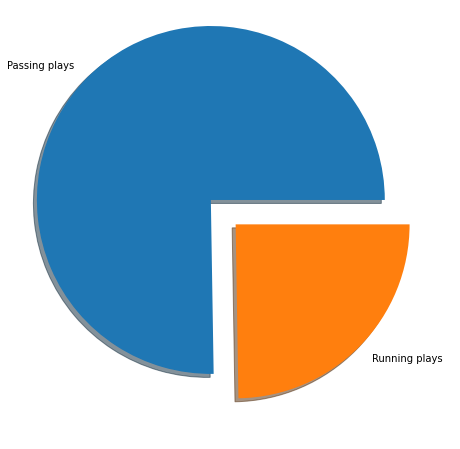

In [10]:
target = [data.play_type.value_counts()[0], data.play_type.value_counts()[1]]
mylabels = ["Passing plays", "Running plays"]
myexplode = [0.2, 0]
plt.figure(figsize=(12,8))
plt.pie(target, labels = mylabels, explode = myexplode, shadow = True)
plt.show() 

### 5.1 Visualization of the target variable with some of the explanative variables <a class="anchor" id="5.1"></a>
[Back to the table of contents](#0.1)

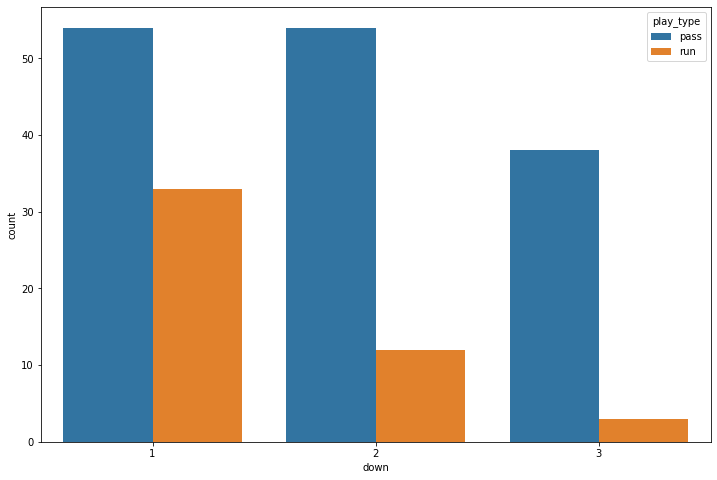

In [11]:
# Play type per Down

plt.figure(figsize=(12,8))
sns.countplot(data=data, x=data.down, hue=data.play_type)
plt.show()

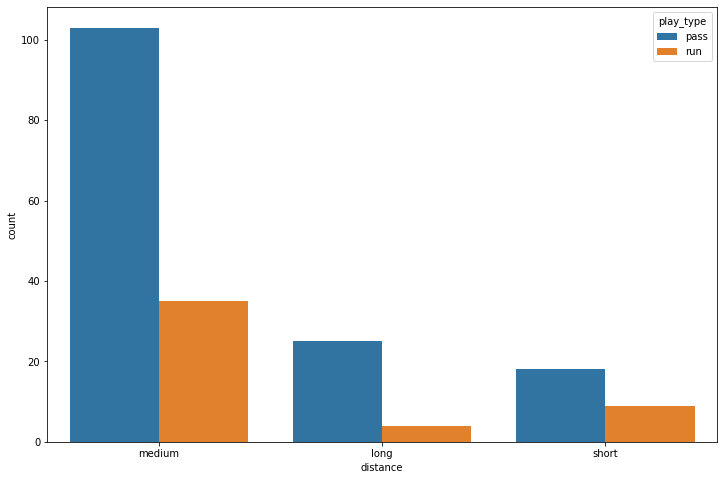

In [12]:
# Play type per Distance

plt.figure(figsize=(12,8))
sns.countplot(data=data, x=data.distance, hue=data.play_type)
plt.show()

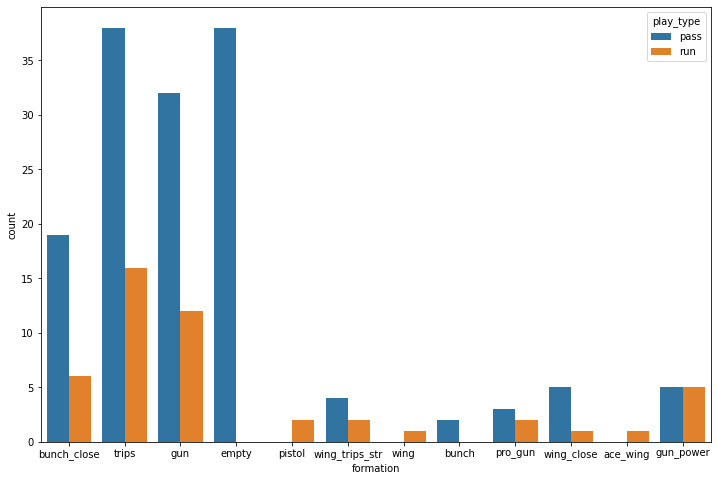

In [13]:
# Play type per Formation

plt.figure(figsize=(12,8))
sns.countplot(data=data, x=data.formation, hue=data.play_type)
plt.show()

## 6. Preprocessing <a class="anchor" id="6"></a>
[Back to the table of contents](#0.1)

### 6.1 Encoding the features <a class="anchor" id="6.1"></a>
[Back to the table of contents](#0.1)

>I will hard code to encode the features since I will deploy an app and I will need to know what's behind every label

In [14]:
def encoder_categorical_variables(dataframe):
    
    # encoding variable "scoreboard"
    scoreboard_mapping = {"tying": 0, "winning": 1, "trailing": 2}
    dataframe['scoreboard'] = dataframe['scoreboard'].map(scoreboard_mapping)

    # encoding variable "distance"
    distance_mapping = {"short": 0, "medium": 1, "long": 2}
    dataframe['distance'] = dataframe['distance'].map(distance_mapping)

    # encoding variable "field"
    field_mapping = {"opponent_field": 0, "own_field": 1}
    dataframe['field'] = dataframe['field'].map(field_mapping)
    
    # encoding variable "hash"
    hash_mapping = {"left": 0, "middle": 1, "right": 2}
    dataframe['hash'] = dataframe['hash'].map(hash_mapping)
    
    # encoding variable "formation"
    formation_mapping = {"trips": 0, "gun": 1, "empty": 2, "bunch_close": 3, "gun_power": 4, "wing_trips_str": 5, 
                         "wing_close": 6, "pro_gun": 7, "pistol": 8, "bunch": 9, "wing": 10, "ace_wing": 11}
    dataframe['formation'] = dataframe['formation'].map(formation_mapping)
    
    # encoding variable "motion"
    motion_mapping = {"no": 0, "yes": 1}
    dataframe['motion'] = dataframe['motion'].map(motion_mapping)
    
    # encoding variable "rb_position"
    rb_position_mapping = {"no_rb": 0, "side_field": 1, "side_boundary": 2, "symmetrical": 3}
    dataframe['rb_position'] = dataframe['rb_position'].map(rb_position_mapping)
    
    # encoding variable "play_type"
    play_type_mapping = {"pass": 0, "run": 1}
    dataframe['play_type'] = dataframe['play_type'].map(play_type_mapping)
    
    # encoding variable "defense_cover_type"
    defense_cover_type_mapping = {"zone_coverage": 0, "mixed_coverage": 1, "man_coverage": 2}
    dataframe['defense_cover_type'] = dataframe['defense_cover_type'].map(defense_cover_type_mapping)
    
    return dataframe

In [15]:
encoder_categorical_variables(data)

,quarter,drive_number,scoreboard,down,distance,field,hash,formation,motion,box,personnel,rb_position,wr_field_side,wr_boundary_side,play_type,defense_front,defense_rush,defense_cover_type
0,1,1,0,1,1,1,0,3,0,7,10,2,3,1,0,33,5,0
1,1,1,0,2,1,1,0,0,0,7,10,2,3,1,0,33,4,1
2,1,1,0,3,1,1,2,0,0,7,10,2,3,1,0,33,4,1
4,1,2,0,1,1,0,0,0,1,7,10,2,2,2,1,33,3,1
5,1,2,0,2,1,0,1,0,0,7,10,2,3,1,0,33,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,4,9,1,2,1,1,0,0,0,7,10,3,3,1,0,34,5,0
215,4,9,1,3,1,1,0,1,0,7,10,1,2,2,0,34,3,0
216,4,9,1,1,1,1,2,1,1,7,10,1,3,1,1,34,6,2
217,4,9,1,2,2,1,2,3,0,7,10,3,3,1,1,34,5,2


### 6.2 Define the target and explanative variables <a class="anchor" id="6.2"></a>
[Back to the table of contents](#0.1)

In [16]:
X = data.drop(columns='play_type', axis=1)
y = data.play_type

### 6.3 Train Test Split <a class="anchor" id="6.3"></a>
[Back to the table of contents](#0.1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Checking if every done value matches

print("Number of rows of X_train = {}".format(len(X_train)))
print("Number of rows of X_test = {}".format(len(X_test)))
print("Number of rows of y_train= {}".format(len(y_train)))
print("Number of rows of y_test = {}".format(len(y_test)))
print("Percentage of train values = {}".format(round(len(X_train)/len(X), 4) * 100),"%")

Number of rows of X_train = 155
Number of rows of X_test = 39
Number of rows of y_train= 155
Number of rows of y_test = 39
Percentage of train values = 79.9 %


## 7. Modeling a Random Forest Classifier using GridSearchCV <a class="anchor" id="7"></a>
[Back to the table of contents](#0.1)

In [19]:
rfc = RandomForestClassifier(random_state = 42)

In [20]:
# Defining the parameters

parameters_rfc = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split' : [30, 100, 300],
    'max_features': ['None', 'sqrt', 'log2'],
    'max_depth' : ['None',4,5,6,7,8],
    'criterion' :['gini', 'entropy','log_loss'],
    'class_weight' : ['balanced', 'balanced_subsample', 'None']
}

In [21]:
# Using the GridSearchCV to find the best model possible

rfc_grid = GridSearchCV(rfc, parameters_rfc, cv = 10, n_jobs = -1, verbose=0)

In [22]:
# Fitting into the train set

rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          'None'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': ['None', 4, 5, 6, 7, 8],
                         'max_features': ['None', 'sqrt', 'log2'],
                         'min_samples_split': [30, 100, 300],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [23]:
print(rfc_grid.best_score_)
print(rfc_grid.best_params_)
print(rfc_grid.best_estimator_)

0.755
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 100, 'n_estimators': 100}
RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=100, random_state=42)


In [24]:
# refitting the best performance of the model into the train set

rfc_cv = (rfc_grid.best_estimator_)
rfc_model = rfc_cv.fit(X_train, y_train)

### 7.1 Evaluation of the Random Forest Classifier <a class="anchor" id="7.1"></a>
[Back to the table of contents](#0.1)

In [25]:
# Classification report

pred_test_rfc_cv = rfc_cv.predict(X_test)
pred_train_rfc_cv = rfc_cv.predict(X_train)
print("Test set")
print(classification_report(y_test, pred_test_rfc_cv))
print("Train set")
print(classification_report(y_train, pred_train_rfc_cv))

Test set
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.40      0.60      0.48        10

    accuracy                           0.67        39
   macro avg       0.62      0.64      0.62        39
weighted avg       0.72      0.67      0.68        39

Train set
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       117
           1       0.42      0.82      0.56        38

    accuracy                           0.68       155
   macro avg       0.67      0.73      0.66       155
weighted avg       0.79      0.68      0.71       155



Accuracy: 0.6666666666666666
Precision: 0.4
Recall: 0.6
f1 score: 0.48
fbeta half: 0.4285714285714286


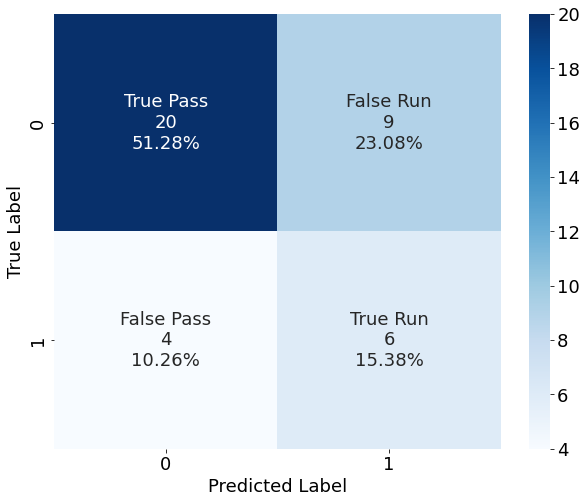

In [26]:
# Confusion Matrix

cm_rfc_cv = confusion_matrix(y_test, pred_test_rfc_cv)
plt.figure(figsize=(10,8))
plt.rc('font', size=18)
group_names = ['True Pass','False Run','False Pass','True Run']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_rfc_cv.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_rfc_cv.flatten()/np.sum(cm_rfc_cv)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rfc_cv, annot=labels, fmt='', cmap='Blues').set(ylabel="True Label", xlabel="Predicted Label")
print("Accuracy:", accuracy_score(y_test, pred_test_rfc_cv))
print("Precision:", precision_score(y_test, pred_test_rfc_cv))
print("Recall:", recall_score(y_test, pred_test_rfc_cv))
print("f1 score:", f1_score(y_test, pred_test_rfc_cv))
print("fbeta half:", fbeta_score(y_test, pred_test_rfc_cv, beta=0.5))

## 8. Modeling a Gradient Boosting Classifier using GridSearchCV <a class="anchor" id="8"></a>
[Back to the table of contents](#0.1)

In [27]:
gbc = GradientBoostingClassifier(random_state = 42)

In [28]:
# Defining the parameters

parameters_gbc = {
    "n_estimators":[10, 100, 200, 500],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "subsample":[0.5, 0.75, 1.0],
    "criterion": ["friedman_mse", "squared_error"],
    "min_samples_split": [np.linspace(0.1, 0.5, 12), 2, 10],
    "min_samples_leaf": [np.linspace(0.1, 0.5, 12), 2, 10],
    "max_depth":["None",3,5,8],
    "max_features":["None", "auto", "sqrt", "log2"]
    }

In [29]:
# Using the GridSearchCV to find the best model possible

gbc_grid = GridSearchCV(gbc, parameters_gbc, cv = 10, n_jobs = -1, verbose=0)

In [30]:
# Fitting into the train set

gbc_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'max_depth': ['None', 3, 5, 8],
                         'max_features': ['None', 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                                              2, 10],
                         'min_samples_split': [array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                                               2, 10],
                         'n_estimators': [10, 100, 200, 500],
                         'subsample': [0.5, 0.75, 1.0]})

In [31]:
print(gbc_grid.best_score_)
print(gbc_grid.best_params_)
print(gbc_grid.best_estimator_)

0.8012500000000001
{'criterion': 'squared_error', 'learning_rate': 0.2, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.75}
GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           max_depth=8, max_features='auto', min_samples_leaf=2,
                           random_state=42, subsample=0.75)


In [32]:
# refitting the best performance of the model into the train set

gbc_cv = (gbc_grid.best_estimator_)
gbc_model = gbc_cv.fit(X_train, y_train)

### 8.1 Evaluation of the Gradient Boosting Classifier <a class="anchor" id="8.1"></a>
[Back to the table of contents](#0.1)

In [33]:
# Classification report

pred_test_gbc_cv = gbc_cv.predict(X_test)
pred_train_gbc_cv = gbc_cv.predict(X_train)
print("Test set")
print(classification_report(y_test, pred_test_gbc_cv))
print("Train set")
print(classification_report(y_train, pred_train_gbc_cv))

Test set
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        29
           1       0.75      0.30      0.43        10

    accuracy                           0.79        39
   macro avg       0.78      0.63      0.65        39
weighted avg       0.79      0.79      0.76        39

Train set
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       117
           1       0.97      1.00      0.99        38

    accuracy                           0.99       155
   macro avg       0.99      1.00      0.99       155
weighted avg       0.99      0.99      0.99       155



Accuracy: 0.7948717948717948
Precision: 0.75
Recall: 0.3
f1 score: 0.4285714285714285
fbeta half: 0.576923076923077


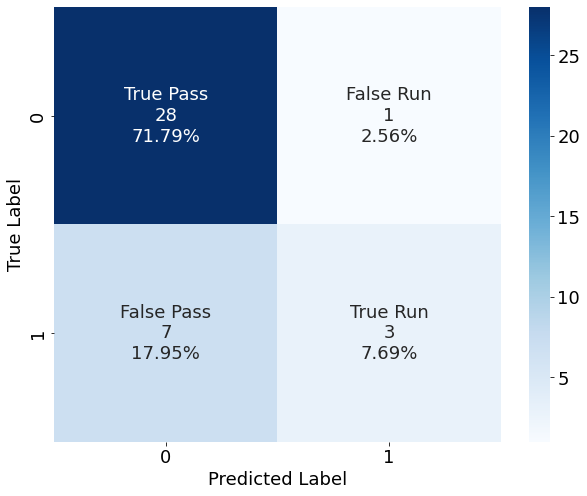

In [34]:
# Confusion Matrix

cm_gbc_cv = confusion_matrix(y_test, pred_test_gbc_cv)
plt.figure(figsize=(10,8))
plt.rc('font', size=18)
group_names = ['True Pass','False Run','False Pass','True Run']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_gbc_cv.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_gbc_cv.flatten()/np.sum(cm_gbc_cv)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_gbc_cv, annot=labels, fmt='', cmap='Blues').set(ylabel="True Label", xlabel="Predicted Label")
print("Accuracy:", accuracy_score(y_test, pred_test_gbc_cv))
print("Precision:", precision_score(y_test, pred_test_gbc_cv))
print("Recall:", recall_score(y_test, pred_test_gbc_cv))
print("f1 score:", f1_score(y_test, pred_test_gbc_cv))
print("fbeta half:", fbeta_score(y_test, pred_test_gbc_cv, beta=0.5))

## 9. Modeling a XGboost Classifier using GridSearchCV <a class="anchor" id="9"></a>
[Back to the table of contents](#0.1)

In [35]:
xgb_clf = XGBClassifier()

In [36]:
# Defining the parameters

parameters_xgb_clf = {
              'objective':['binary:logistic'],
              'learning_rate': [.0001, 0.001, .01, 0.1, 0.15, 0.2],
              'max_depth': [3, 5, 7,9,11,13],
              'min_child_weight': [1,3,5,7,9],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [100, 200, 250, 300, 350, 400, 500]}

In [37]:
# Using the GridSearchCV to find the best model possible

xgb_grid = GridSearchCV(xgb_clf, parameters_xgb_clf, cv = 10, n_jobs = -1, verbose=0)

In [43]:
# Fitting into the train set

xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.5, 1.0],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.15, 0.2],
                         'max_depth': [3, 5, 7, 9, 11, 13],
                         'min_child_weight': [1, 3, 5, 7, 9],
                         'n_estimators': [100, 200, 250, 300, 350, 400, 500],
                         'objective': ['binary:logistic'],
                         'subsample': [0.1, 0.5, 1.0]})

In [39]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
print(xgb_grid.best_estimator_)

0.7933333333333332
{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'objective': 'binary:logistic', 'subsample': 0.1}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [40]:
# refitting the best performance of the model into the train set

xgb_cv = (xgb_grid.best_estimator_)
xgb_model = xgb_cv.fit(X_train, y_train)

### 9.1 Evaluation of the XGboost Classifier <a class="anchor" id="9.1"></a>
[Back to the table of contents](#0.1)

In [41]:
# Classification report

pred_test_xgb_cv = xgb_cv.predict(X_test)
pred_train_xgb_cv = xgb_cv.predict(X_train)
print("Test set")
print(classification_report(y_test, pred_test_xgb_cv))
print("Train set")
print(classification_report(y_train, pred_train_xgb_cv))

Test set
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.60      0.30      0.40        10

    accuracy                           0.77        39
   macro avg       0.70      0.62      0.63        39
weighted avg       0.74      0.77      0.74        39

Train set
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       117
           1       0.70      0.42      0.52        38

    accuracy                           0.81       155
   macro avg       0.76      0.68      0.70       155
weighted avg       0.80      0.81      0.80       155



Accuracy: 0.7692307692307693
Precision: 0.6
Recall: 0.3
f1 score: 0.4
fbeta half: 0.5


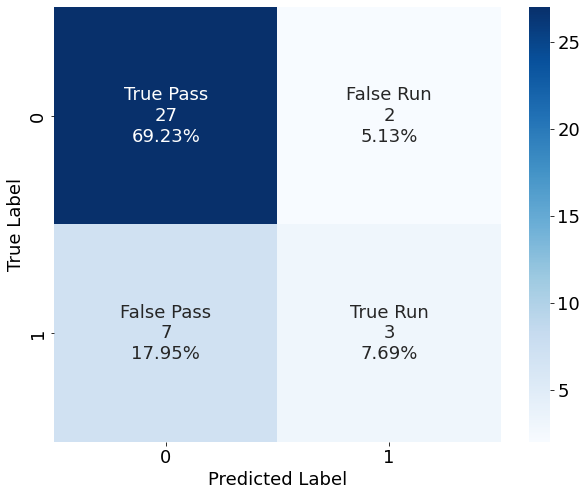

In [42]:
# Confusion Matrix

cm_xgb_cv = confusion_matrix(y_test, pred_test_xgb_cv)
plt.figure(figsize=(10,8))
plt.rc('font', size=18)
group_names = ['True Pass','False Run','False Pass','True Run']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm_xgb_cv.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm_xgb_cv.flatten()/np.sum(cm_xgb_cv)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_xgb_cv, annot=labels, fmt='', cmap='Blues').set(ylabel="True Label", xlabel="Predicted Label")
print("Accuracy:", accuracy_score(y_test, pred_test_xgb_cv))
print("Precision:", precision_score(y_test, pred_test_xgb_cv))
print("Recall:", recall_score(y_test, pred_test_xgb_cv))
print("f1 score:", f1_score(y_test, pred_test_xgb_cv))
print("fbeta half:", fbeta_score(y_test, pred_test_xgb_cv, beta=0.5))

## 10. Conclusions <a class="anchor" id="10"></a>
[Back to the table of contents](#0.1)

>To take a conclusion and choose the best performance of the models, which results should I look for?
>
>Obviously **accuracy** is super important because it's going to give us the good predictions, but in case of error, which error would I prefer to have?
>
>>Here we need a deep knowledge about the topic because one could say that both errors are the same, but the difference here is that if we put a defensive scheme on the field to defend the pass but they play a running play, we will have troubles to defend that, but we can stop them quite well anyway. In other case, if they play a passing play when we put on the field a defensive scheme to stop the run, it could be a disaster and probably an annotation against us.
>
>In conclusion, we have to focus on the **precision** since it's better to have a false negative than a false positive and we want to minimize false positive as much as we can.
>
>Another score we should pay attention for is the **fbeta half** because it pays more attention on the precision than the recall.

>We have here three models with different results:
>
>>The **Random Forest Classifier** has an accuracy of 0.67, a precission of 0.4 and a fbeta half of 0.43 and there is almost no over-fitting.
>It can predict 20 True negatives, 9 false positives, 6 true positives and 4 false negatives. It's predicting 5 passing plays less than the groundtruth so we could struggle on those plays.
>
>>The **Gradient Boosting Classifier** has an accuracy of 0.79, a precission of 0.75 and a fbeta half of 0.58 but with a huge over-fitting of 20 points.
>It can predict 28 True negatives, 1 false positives, 3 true positives and 7 false negatives. It's predicting 6 passing plays more than the groundtruth so we could struggle a bit on those plays but less than with the RFC.
>
>>The **XGBoost Classifier** has an accuracy of 0.77, a precission of 0.6 and a fbeta half of 0.5 with just a subtle over-fitting of 4 points.
>It can predict 27 True negatives, 2 false positives, 3 true positives and 7 false negatives. It's predicting 5 passing plays more than the groundtruth so we could struggle a bit on those plays but less than with the RFC.
>
>Analyzing the above results, I will choose the **XGBoost Classifier** as the model with the best performance because although the GBC has better accuracy and prediction, it has a huge over-fitting. The results with the XGBoost are almost the same than with the GBC and the train and the test sets are balanced on top of that.

## 11. Saving the model to deploy it <a class="anchor" id="11"></a>
[Back to the table of contents](#0.1)

In [44]:
xgb_model.save_model('predict_a_play_model.json')